# **Hospital Length of Stay (LOS) Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Importing Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector

# To plot the performance of the model with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
# Read the healthcare dataset file
data = pd.read_csv("data/healthcare_data.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

## **Data Overview**

In [4]:
# View the first 5 rows of the dataset
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [5]:
# View the last 5 rows of the dataset
data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


In [6]:
# Understand the shape of the data
data.shape

(500000, 15)

- The dataset has **5,00,000 rows and 15 columns.**
- The sales of the store are indicated by the variable Product_Store_Sales_Total is the target variable and the rest of the variables are independent variables based on which we will predict the total sales of the stores for the upcoming quarter.

In [7]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

**Observations:**

-  Available Extra Rooms in Hospital, staff_available, patientid, Visitors with Patient, Admission_Deposit, and Stay (in days) are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**
- The column patientid is an identifier for patients in the data. This column will not help with our analysis so we can drop it.

In [8]:
# To view patientid and the number of times they have been admitted to the hospital
data['patientid'].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

**Observation:**

- **The maximum number of times the same patient admitted to the hospital is 21 and minimum is 1.**

In [9]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["patientid"])

In [10]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

**Observation:** 
- Data contains unique rows. There is no need to remove any rows.

In [11]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


**Observations:**

* There are around **3 rooms available in the hospital on average** and there are times when the hospital is full and there are no rooms available (minimum value is 0). The **maximum number of rooms available in the hospital is 24**.
* **On average, there are around 5 staff personnel available to treat the new patients** but it can also be zero at times. The maximum number of staff available in the hospital is 10.
* **On average, around 3 visitors accompany the patient.** Some patients come on their own (minimum value is zero) and a few cases have 32 visitors. It will be interesting to see if there is any relationship between the number of visitors and the severity of the patient.
* **The average admission deposit lies around 4,722 dollars and a minimum of 1,654 dollars is paid on every admission.**
* **Patient's stay ranges from 3 to 51 days.** There might be outliers in this variable. The median length of stay is 9 days.

In [12]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
--------------------------------------------------
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
--------------------------------------------------
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: Severity of Illness, dtype: float64
--------------------------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
--------------------------------------------------
Yes    0.78592
No     0.21408
Name: Insurance, dtype: float64
--------------------------------------------------
None                   0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: hea

**Observations:**

- **The majority of patients (~82%) admit to the hospital with moderate and minor illness**, which is understandable as extreme illness is less frequent than moderate and minor illness. 
- **Gynecology department gets the most number of patients (~68%)** in the hospital, whereas patients in Surgery department are very few (~1%).
- **Ward A and C accommodate the least number of patients (~12%).** These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards also stay for longer duration.
- **The majority of patients belong to the age group of 21-50 (~75%), and the majority of patients are women (~74%).** The most number of patients in the gynecology department of the hospital can justify this.
- Most of the patients admitted to the hospital are the cases of trauma (~62%).
- After 'Other' category, **High Blood Pressure and Diabetes are the most common health conditions.**

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [13]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins #, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

#### **Length of stay**

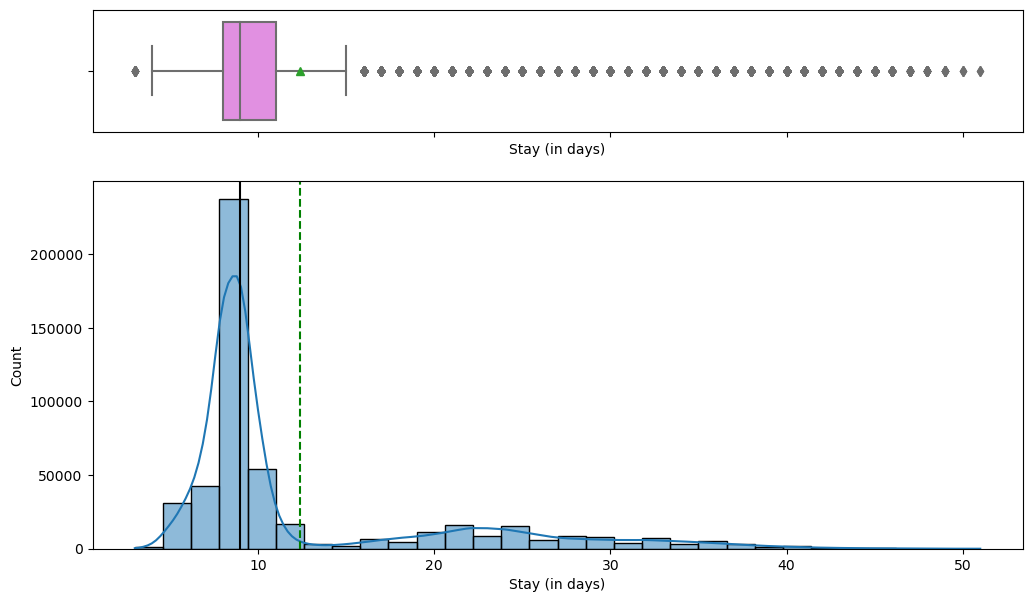

In [14]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

**Observations:**

- **Fewer patients are staying more than 10 days in the hospital and very few stay for more than 40 days**. This might be because the majority of patients are admitted for moderate or minor illnesses. 
- The peak of the distribution shows that **most of the patients stay for 8-9 days in the hospital.** 

#### **Admission Deposit**

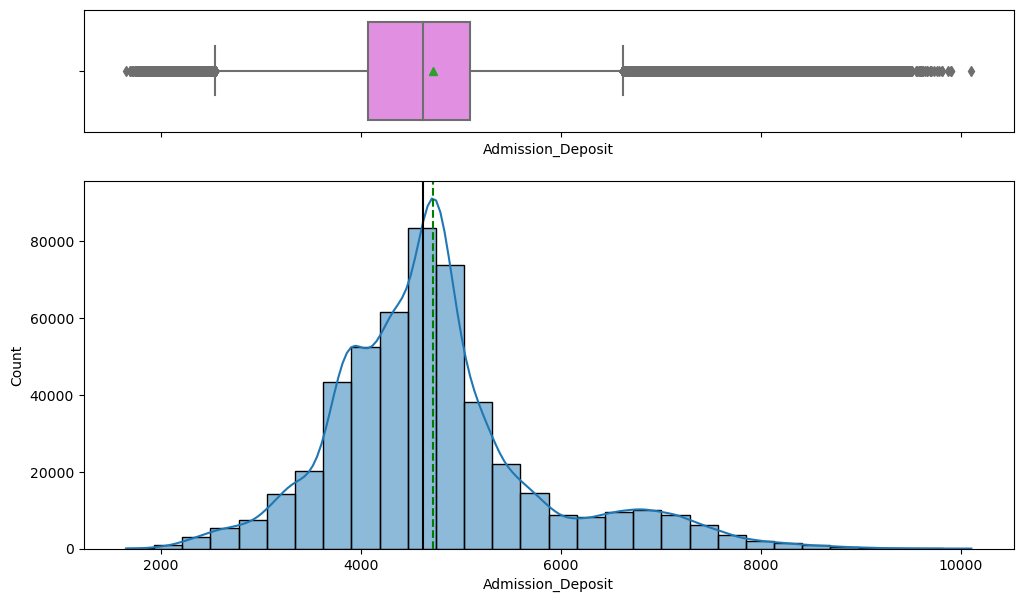

In [15]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 30)

**Observation:**

- The **distribution of admission fees is close to normal with outliers on both sides**. Few patients are paying a high amount of admission fees and few patients are paying a low amount of admission fees.

#### **Visitors with Patients**

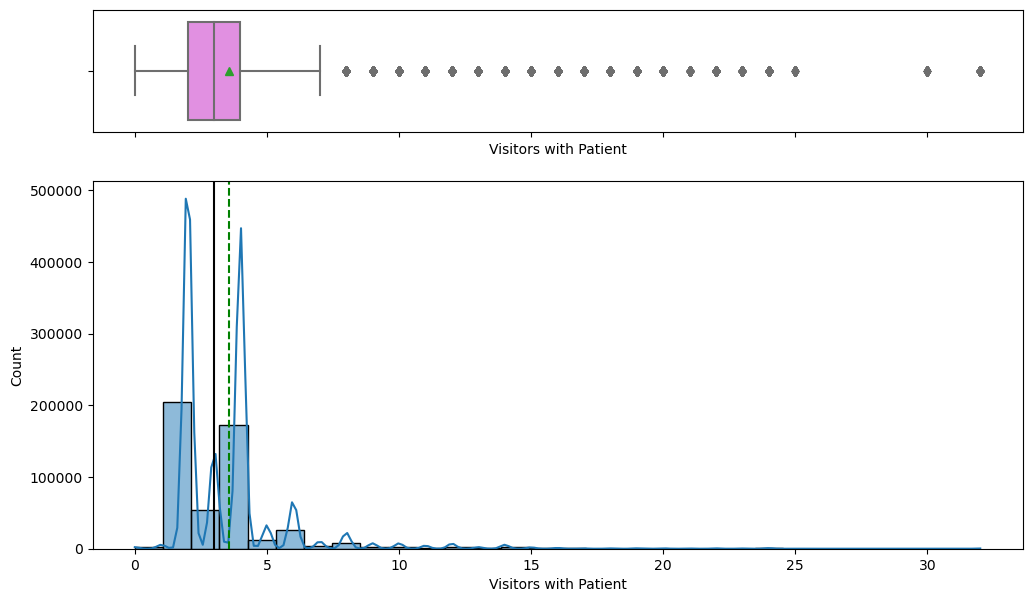

In [16]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 30)

**Observations:**

- The distribution of the number of visitors with the patient is **highly skewed towards the right**.
- **2 and 4 are the most common number of visitors with patients.**

### **Bivariate Analysis**

<Axes: >

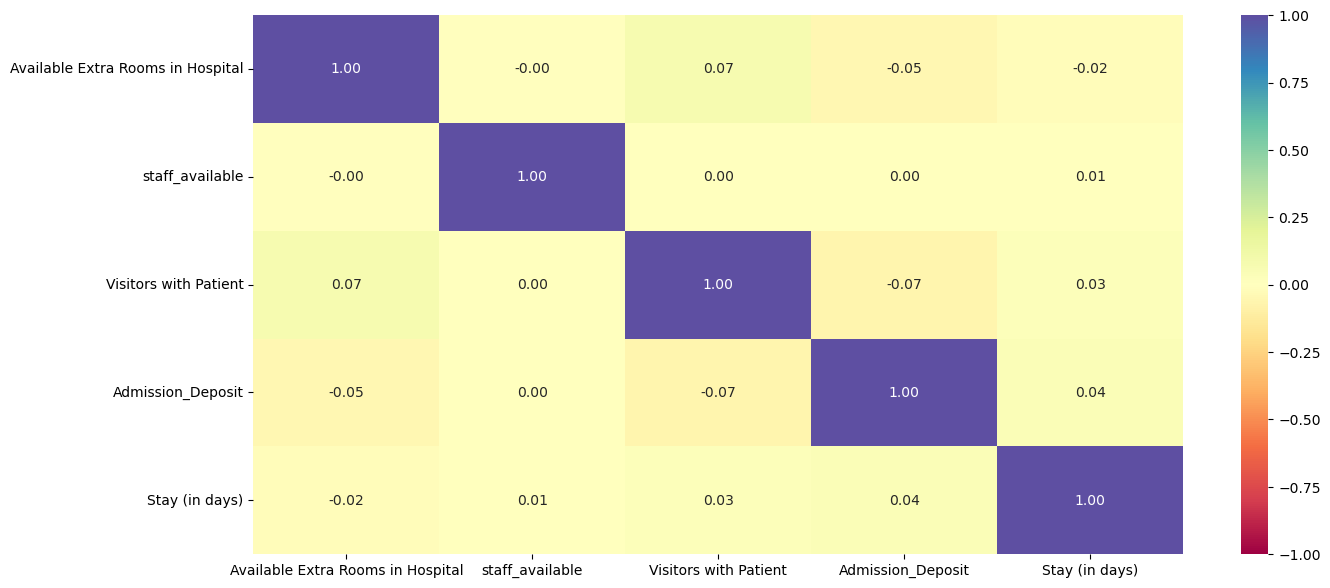

In [17]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(numeric_only=True), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:** 
- The heatmap shows that there is **no correlation between variables**.
- The continuous variables show no correlation with the target variable (Stay (in days)), which indicates that the **categorical variables might be more important for the prediction.**

In [18]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

**Let's start by checking the distribution of the LOS for the various wards**

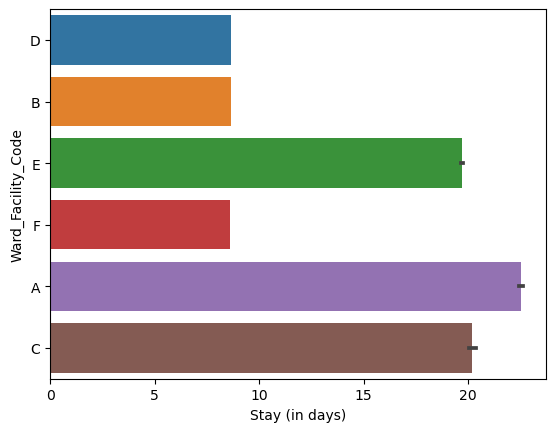

In [19]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)
plt.show()

**Observation:**

- The hypothesis we made earlier is correct, i.e., **wards A and C has the patients staying for the longest duration, which implies these wards might be for patients with serious illnesses.**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

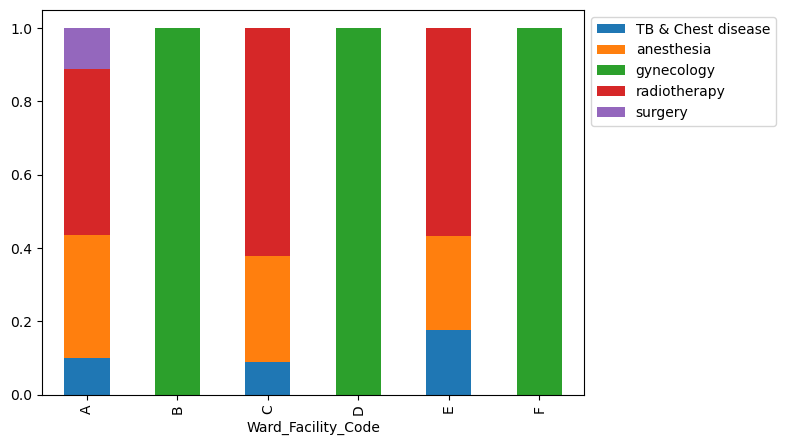

In [20]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

**Observations:**

- **Ward Facility B, D, and F are dedicated only to the gynecology department.**
- Wards A, C, and E have patients with all other diseases, and **patients undergoing surgery are admitted to ward A only.**

**Usually, the more severe the illness, the more the LOS, let's check the distribution of severe patients in various wards.**

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


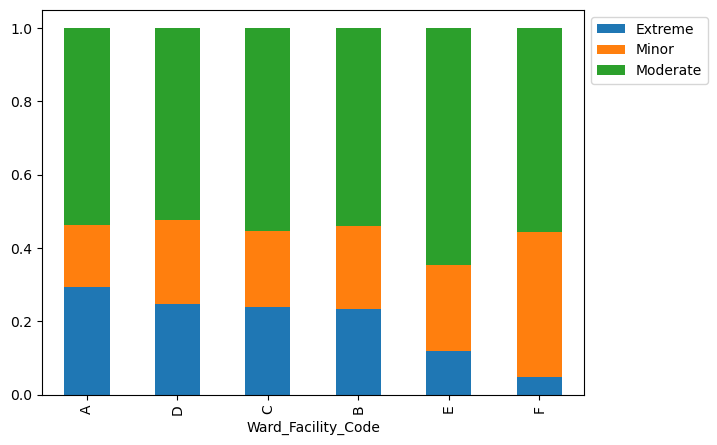

In [21]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations:**

- **Ward A has the highest number of extreme cases.** We observed earlier that ward A has the longest length of stay in the hospital as well. It might require more staff and resources as compared to other wards.
- **Ward F has the highest number of minor cases and Ward E has the highest number of moderate cases.**

**Age can also be an important factor to find the length of stay. Let's check the same.**

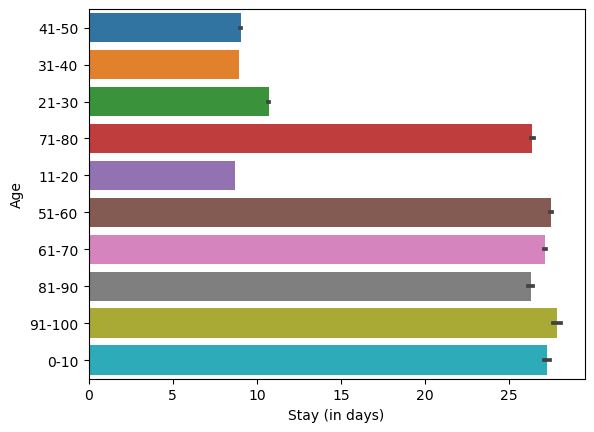

In [22]:
sns.barplot(y = 'Age', x = 'Stay (in days)', data = data)
plt.show()

**Observation:**

- **Patients aged between 1-10 and 51-100 tend to stay the most number of days in the hospital.** This might be because the majority of the patients between the 21-50 age group get admitted to the gynecology department and patients in age groups 1-10 and 5-100 might get admitted due to some serious illness.

**Let's look at the doctors, their department names, and the total number of patients they have treated.**

In [23]:
data.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count')

,Department_Name,Patients_Treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


**Observations:**

- The hospital employs a total of 9 doctors. Four of the doctors work in the department of gynecology, which sees the most patients.
- The majority of patients that attended the hospital were treated by Dr. Sarah and Olivia.
- Two doctors are working in the surgical department (Dr. Isaac and Dr. Simon), while Dr. Sam works in the radiotherapy department.
- The only two doctors who work in several departments are Dr. John and Dr. Mark.

## **Data Preparation for Model Building**

- Before we proceed to build a model, we'll have to encode categorical features.
- Separate the independent variables and dependent Variables.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [24]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [25]:
# Check the data after handling categorical data
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624.733654,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814.149231,8,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,2,10,2,5169.269637,34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
499996,13,8,2,4631.550257,11,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
499997,2,3,2,5456.930075,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
499998,2,1,2,4694.127772,23,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [26]:
# Separating independent variables and the target variable
x = data.drop('Stay (in days)',axis=1)

y = data['Stay (in days)'] 

In [27]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [28]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


## **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression models evaluation. We will define a function to calculate these metric.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average of absolute percentage error for all data points. The absolute percentage error is defined as predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [29]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# Checking performance on the training data
linear_reg = model_performance_regression(model, x_train, y_train)
linear_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135092,2.14624,0.842813,0.842796,19.591781


In [32]:
# Checking performance on the testing data
linear_reg_test = model_performance_regression(model, x_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842964,19.676874


**Observations:**

- **The Root Mean Squared Error** and the **adjusted $R^2$** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- The adjusted $R^2$ of ~0.84 implies that the independent variables are able to explain ~84% variance in the target variable.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same, i.e., days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

## Regularization

**Regularization** is a fundamental concept in machine learning. It is a method of preventing the model from **overfitting** by adding additional information to it.

The machine learning model may perform well with training data but not with test data. It means that when dealing with unseen data, the model cannot anticipate the result since it introduces noise into the output, and so the model is termed **overfit**. A **regularization** technique can be used to solve this problem.

By lowering the magnitude of the variables, this technique allows for the preservation of all variables or features in the model. As a result, it maintains accuracy as well as model generalization.

Its primary function is to regularize or lower the coefficient of features towards zero. In other words, "the regularization strategy reduces the magnitude of the features while maintaining the same number of features."

Regularization is accomplished by introducing a penalty or complexity term into the complex model.

Regularization procedures are classified into two types, which are listed below:


- **Ridge Regression**
- **Lasso Regression**

## Ridge Regression

**Ridge regression** is a sort of linear regression in which a **small amount of bias** is introduced to improve long-term predictions.

- Ridge regression is a regularization technique that is **used to reduce model complexity**. It's also known as **$L_2$ regularization**.

- The penalty term is added to the cost function in this technique. The amount of bias introduced into the model is referred to as the **Ridge Regression penalty**.

- We may compute it by multiplying the squared weight of each individual feature by the alpha.

- In general, Ridge Regression calculates the equation's parameters:

$$\Large\ \hat{y}\  = slope \times X + y\ intercept$$

By minimizing the:

$$\Large\ the\ sum\ of\ squared\ residuals + \alpha \times slope^{2} $$ 

- As we can see from the above equation, if the values of $\alpha$ tend to **zero**, the equation becomes the linear regression model's cost function. As a result, for the **minimum value of $\alpha$**, the model will be similar to the linear regression model.

- Because a general linear or polynomial regression will fail if the independent variables are highly collinear, Ridge regression can be utilized to tackle such situations.
- **When we have more parameters than samples, it is easier to solve problems using Ridge Regression.**

### Ridge Regression with default parameters

In [33]:
ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(x_train, y_train) # Fitting the data into the model

Ridge()

In [34]:
ridge_reg = model_performance_regression(ridge_model, x_test, y_test) #getting performance metrics on test data
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144039,2.155819,0.84303,0.842964,19.677875


**Observations:**

- The performance metrics are showing almost similar results as compared to the Least Squares method.

### Ridge Regression with optimized $\large\alpha$

In [35]:
folds = KFold(n_splits=10, shuffle=True, random_state=1) 
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]} 
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [36]:
model_cv.best_params_ #getting optimised parameters for alpha

{'alpha': 0.1}

In [37]:
ridge_model_tuned = Ridge(alpha=0.1) ##creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned.fit(x_train, y_train) # Fitting the data into the tuned model

Ridge(alpha=0.1)

In [38]:
ridge_reg_tuned = model_performance_regression(ridge_model_tuned, x_test, y_test) #getting performance metrics on test data
ridge_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144037,2.155765,0.84303,0.842964,19.676974


**Observations:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.1.
- It can be observed that after tuning the parameters of Ridge Regression, the performance parameters does not change implying that Ridge Regression does not help in improving the model.

## Lasso Regression

**Lasso regression** is another regularisation technique for reducing model complexity. It is an abbreviation for **Least Absolute and Selection Operator.**

- It is identical to Ridge Regression except that the **penalty term only contains absolute weights** rather than a square of weights.


- Because it uses absolute data, it **can decrease the slope to zero**, whereas **Ridge Regression can only get close to zero**.

- It is also known as **$L_1$ regularisation**.

Fundamentally, Lasso Regression calculates the equation's parameters:

$$\Large\ \hat{y}\  = slope \times X + y\ intercept$$

By minimizing the:

$$\Large\ the\ sum\ of\ squared\ residuals + \alpha \times |slope| $$ 

### Lasso Regression with default parameters

In [39]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [40]:
lasso_reg = model_performance_regression(lasso_model, x_test, y_test)
lasso_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.064339,3.873332,0.416006,0.41576,34.652716


**Observations:**

- After fitting the data into Lasso Regression Model with default value of alpha (=1), the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

### Lasso Regression with optimized $\large\alpha$

In [41]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [42]:
model_cv.best_params_

{'alpha': 0.001}

In [43]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(x_train, y_train)

Lasso(alpha=0.001)

In [44]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, x_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144315,2.157198,0.843002,0.842936,19.70296


**Observation:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001.
- The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve. 

## Elastic Net Regression

**Elastic Net** is a regularized regression model that combines $L_1$ and $L_2$ penalties, i.e., **lasso** and **ridge** regression. As a result, it performs a more efficient smoothing process.

- The elastic net includes the **penalty of lasso regression**, and **when used in isolation, it becomes the ridge regression**. 
- In the procedure of regularization with an elastic net, **first, the coefficient of ridge regression is determined**. 
- After this, a **lasso algorithm is performed on the ridge regression coefficient to shrink the coefficient**.
- It has two parameters to be set, $\large\alpha_1$ and $\large\alpha_2$ where $\large\alpha_1$ controls the $L_1$ penalty and $\large\alpha_2$ controls the $L_2$ penalty.

Instead of utilising two $\large\alpha$-parameters, we can use simply one $\large\alpha$ and one $L_1$-ratio-parameter, which sets the proportion of our $L_1$ penalty in relation to $\large\alpha$. If $\large\alpha = 1$ and $L_1$-ratio = 0.3, our $L_1$ penalty is multiplied by 0.3, and our $L_2$ penalty is multiplied by $1 - L_1-ratio = 0.7$.

$$\large{ElasticNetMSE = MSE(y,y_{pred}) + {\alpha \cdot (1 - L_1Ratio)} \sum_{i=1}^m{{|\theta_i|}+ {\alpha \cdot L_1Ratio} \sum_{i=1}^m{{|\theta_i|}}}}$$ 

### Elastic Net Regression with default parameters

In [45]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)

ElasticNet()

In [46]:
elasticnet_reg = model_performance_regression(elasticnet_model, x_test, y_test)
elasticnet_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.556087,4.678504,0.317455,0.317168,40.121657


**Observations:**

- After fitting the data into Elastic Net Model with default value of alpha (=1) and l1_ratio, the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

### Elastic Net Regression with optimized $\alpha$ and $L_1-ratio$

In [47]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model = ElasticNet()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(x_train,y_train)

C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+04, tolerance: 2.254e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+04, tolerance: 2.254e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jaces\.conda\envs\base_mit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [48]:
model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.05}

In [49]:
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.05)
elasticnet_model_tuned.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [50]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, x_test, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.157481,2.178912,0.841685,0.841618,19.981591


**Observation**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.05.
- The performance metrics are showing almost similar results as compared to Least Squares method, Ridge Regression and Lasso Regression, implying that after tuning the Elastic Net, the model does not improve.

In [51]:
models= pd.concat([linear_reg_test,ridge_reg,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,Least Squares,3.144036,2.155759,0.843030,0.842964,19.676874
0,Ridge Regression,3.144039,2.155819,0.843030,0.842964,19.677875
0,Ridge Regression Tuned,3.144037,2.155765,0.843030,0.842964,19.676974
0,Lasso Regression,6.064339,3.873332,0.416006,0.415760,34.652716
0,Lasso Regression Tuned,3.144315,2.157198,0.843002,0.842936,19.702960
0,Elastic Net Regression,6.556087,4.678504,0.317455,0.317168,40.121657
0,Elastic Net Regression Tuned,3.157481,2.178912,0.841685,0.841618,19.981591


**Observations:**

- As per the above result, the **Least Squares Method** is giving the best results as compared to other models. 
- Regularization technique does not offer any significant improvement to the performance metrics.
- So, we will apply some **Non Linear models** to check if the model performance improves or not.

### Forward Feature Selection using SequentialFeatureSelector

We will see how to use **SequentialFeatureSelector** to select a subset of key features using forward feature selection. It is a greedy search algorithm that is used to **reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d**. It is useful to automatically select a subset of the most relevant featuresthat are most relevant to the problem.

**Why should we do feature selection?**

- Reduces dimensionality
- Discards deceptive features; Deceptive features appear to aid learning on the training set but impair generalization
- Speeds training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We will use forward feature selection on all the variables.

**Parameters to pass in SequentialFeatureSelector:**

- **estimator:** scikit-learn classifier or regressor.

- **k_features:** int or tuple or str (default: 1). 

    - The number of features to choose, where k features equals the entire feature collection, can be specified as an integer.
    - The SFS will consider returning any feature combination between min and max that scored highest in cross-validation if a tuple containing a min and max value is provided. For example, instead of a set amount of characteristics k, the tuple (1, 4) will return any combination of 1 to 4 features.
    - A string argument such as "best" or "parsimonious". If you choose "best," the feature selector will provide the feature subset with the best cross-validation performance. If the input "parsimonious" is provided, the smallest feature subset that is within one standard error of the cross-validation performance will be chosen.
    
- **forward:** bool (default: True). Forward selection if True, backward selection otherwise.

- **floating:** bool (default: False). Adds a conditional exclusion/inclusion if True:

    - Sequential floating forward selection (SFFS) starts from the empty set.
    - After	each forward step, it performs backward	steps as long as the objective function increases.
    - Once it stops increasing, the forward selection is continued.

- **verbose:** int (default: 0), level of verbosity to use in logging. If 0 then no output, if 1then the number of features in the current set, and if 2 then detailed logging including timestamp and cv scores at each step.

- **scoring:** str, callable, or None (default: None). If None (default), uses 'accuracy' for sklearn classifiers and 'r2' for sklearn regressors.

- **cv:** int (default: 5). Integer or iterable yielding train, test splits. If cv is an integer and estimator is a classifier (or y consists of integer class labels) stratified k-fold. Otherwise, regular k-fold cross-validation is performed. No cross-validation if cv is None, False, or 0.

- **n_jobs:** int (default: 1). The number of CPUs to use for evaluating different feature subsets in parallel. -1 means 'all CPUs'.

In [52]:
# Initializing the model to pass to SFS
reg = LinearRegression()

# Forward Feature Selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True, 
    floating=False,
    scoring="r2",
    n_jobs=-1,  
    verbose=2,
    cv=5,
)

# Perform SFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    8.4s finished

[2023-06-14 10:08:17] Features: 1/42 -- score: 0.49188988610314566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    6.2s finished

[2023-06-14 10:08:23] Features: 2/42 -- score: 0.6046160397618389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.6s finished

[2023-06-14 10:08:31] Features: 3/42 -- score: 0.6461909142668083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    8.6s finished

[2023-06-14 10:08:40] Feat

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.3s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.1s finished

[2023-06-14 10:19:31] Features: 32/42 -- score: 0.8427809322153685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   20.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.1s finished

[2023-06-14 10:19:56] Features: 33/42 -- score: 0.84278081300666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   18.5s remaining:   23.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   21.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   21.8s finished

[2023-06-14 10:20:19] Features: 34/42 -- score: 0.8427802205618737[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out 

Now, let's plot the the model performance with addition of each feature. We will use the **plot_sequential_feature_selection** function for this. It has the following parameters:

- **metric_dict:** mlxtend.SequentialFeatureSelector.get_metric_dict() object, which is a dictionary with items where each dictionary value is a list with the number of iterations (number of feature subsets) as its length. The **dictionary keys** corresponding to these lists are as follows:
    - 'feature_idx': tuple of the indices of the feature subset 
    - 'cv_scores': list with individual CV scores 
    - 'avg_score': of CV average scores
    - 'feature_names': Name of features in the subset
    - 'ci_bound': confidence interval bound of the CV score average
    - 'std_dev': standard deviation of the CV score average 
    - 'std_err': standard error of the CV score average 

- **figsize:** tuple (default: None). Height and width of the figure.

- **kind:** str (default: "std_dev"). The kind of error bar or confidence interval in {'std_dev', 'std_err', 'ci', None}.

- **color:** str (default: "blue"). Color of the lineplot (accepts any matplotlib color name).

- **bcolor:** str (default: "steelblue"). Color of the error bars / confidence intervals (accepts any matplotlib color name).

- **marker:** str (default: "o"). Marker of the line plot (accepts any matplotlib marker name).

- **alpha:** float in [0, 1] (default: 0.2). Transparency of the error bars / confidence intervals.

- **ylabel:** str (default: "Performance"). Y-axis label.

- **confidence_interval:** float (default: 0.95). Confidence level if kind='ci'.

In [53]:
sfs.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.48930483, 0.48939957, 0.49302582, 0.48922331, 0.4984959 ]),
  'avg_score': 0.49188988610314566,
  'feature_names': ('Department_gynecology',),
  'ci_bound': 0.004631493101657891,
  'std_dev': 0.0036034589801328515,
  'std_err': 0.0018017294900664258},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.60393142, 0.60360277, 0.60160635, 0.60347042, 0.61046924]),
  'avg_score': 0.6046160397618389,
  'feature_names': ('Department_gynecology', 'Department_radiotherapy'),
  'ci_bound': 0.003903818905262807,
  'std_dev': 0.003037303733853375,
  'std_err': 0.0015186518669266873},
 3: {'feature_idx': (5, 6, 23),
  'cv_scores': array([0.64519204, 0.6466788 , 0.64365579, 0.64406087, 0.65136707]),
  'avg_score': 0.6461909142668083,
  'feature_names': ('Department_gynecology',
   'Department_radiotherapy',
   'Age_31-40'),
  'ci_bound': 0.003589267960521012,
  'std_dev': 0.0027925724125148293,
  'std_err': 0.0013962862062574146},
 4: {'feature_idx'

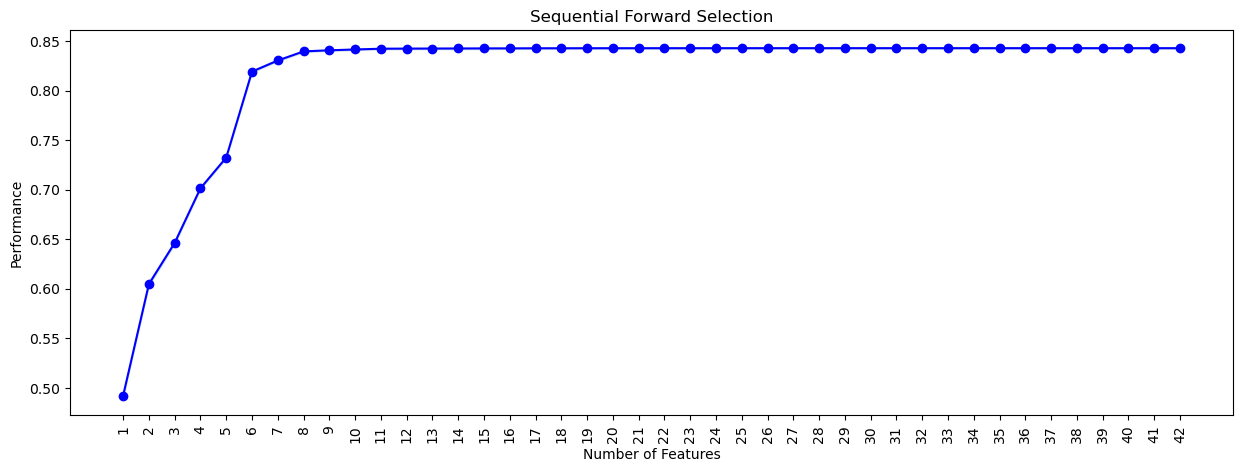

In [54]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection")
plt.xticks(rotation=90)
plt.show()

In [55]:
sfs.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.48930483, 0.48939957, 0.49302582, 0.48922331, 0.4984959 ]),
  'avg_score': 0.49188988610314566,
  'feature_names': ('Department_gynecology',),
  'ci_bound': 0.004631493101657891,
  'std_dev': 0.0036034589801328515,
  'std_err': 0.0018017294900664258},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.60393142, 0.60360277, 0.60160635, 0.60347042, 0.61046924]),
  'avg_score': 0.6046160397618389,
  'feature_names': ('Department_gynecology', 'Department_radiotherapy'),
  'ci_bound': 0.003903818905262807,
  'std_dev': 0.003037303733853375,
  'std_err': 0.0015186518669266873},
 3: {'feature_idx': (5, 6, 23),
  'cv_scores': array([0.64519204, 0.6466788 , 0.64365579, 0.64406087, 0.65136707]),
  'avg_score': 0.6461909142668083,
  'feature_names': ('Department_gynecology',
   'Department_radiotherapy',
   'Age_31-40'),
  'ci_bound': 0.003589267960521012,
  'std_dev': 0.0027925724125148293,
  'std_err': 0.0013962862062574146},
 4: {'feature_idx'

**Observations:** 

- We can observe that the performance increases till the 8th feature and then becomes constant.
- The decision to choose the *k_features* now depends on the $R^2$ vs the complexity of the model.
    - With 8 features, we are getting an $R^2$ of 0.840.
    - With 20 features, we are getting an $R^2$ of 0.844.
    - With 42 features, we are getting an $R^2$ of 0.843.
- The increase in $R^2$ is not very significant as we are getting approximately the same values with a less complex model.
- So we'll use 8 features only to build the Linear Regression model, but you can experiment by taking a different number.
- Number of features chosen can also depend on the business context and use case of the model.

Let's run the Sequential Feature Selector again to find the best 8 features for the model.

In [56]:
reg = LinearRegression()

# Forward feature selection with 8 features
sfs = SFS(
    reg,
    k_features=8,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.3s finished

[2023-06-14 10:21:57] Features: 1/8 -- score: 0.49188988610314566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    5.6s finished

[2023-06-14 10:22:03] Features: 2/8 -- score: 0.6046160397618389[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.7s finished

[2023-06-14 10:22:10] Features: 3/8 -- score: 0.6461909142668083[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    7.8s finished

[2023-06-14 10:22:18] Feature

In [57]:
# Selecting the features which are important for the model
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[4, 5, 6, 7, 21, 22, 23, 24]


In [58]:
# Checking the names of the important features
x_train.columns[feat_cols]

Index(['Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Age_11-20',
       'Age_21-30', 'Age_31-40', 'Age_41-50'],
      dtype='object')

**Now, we will fit the Linear Regression model using these 8 features only.**

In [59]:
# Creating the new x_train data
x_train_final = x_train[x_train.columns[feat_cols]]

In [60]:
# Creating the new x_test data
x_test_final = x_test[x_train_final.columns]

In [61]:
# Fitting Linear Regression model on the new training data
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

LinearRegression()

In [62]:
# Checking model performance on the training data
lin_reg_model2_train_perf = model_performance_regression(lin_reg_model2, x_train_final, y_train)
lin_reg_model2_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.167762,2.16747,0.83952,0.839516,19.769004


In [63]:
# Checking model performance on the testing data
lin_reg_model2_test_perf = model_performance_regression(lin_reg_model2, x_test_final, y_test)
lin_reg_model2_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.175516,2.174951,0.839871,0.839858,19.83425


**Observations:**
- The performance looks approximately the same as the previous model with all the variables.
- Let's compare the two models we built.

In [64]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [linear_reg.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.135092,3.167762
MAE,2.146240,2.167470
R-squared,0.842813,0.839520
Adj. R-squared,0.842796,0.839516
MAPE,19.591781,19.769004


In [65]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [linear_reg_test.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,3.144036,3.175516
MAE,2.155759,2.174951
R-squared,0.843030,0.839871
Adj. R-squared,0.842964,0.839858
MAPE,19.676874,19.834250


* The new model (**lin_reg_model2**) uses 8 features in comparison to 42 features for the previous model (**linear_reg**), i.e., the number of features has reduced by ~81%.
* The performance of the new model, however, is very close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.

## Next Steps

- We have explored building a Linear Regression model for this problem statement of predicting the likely length of stay of a patient for a hospital visit, and we've also identifies the most important features for the model, and trained the model using only those features, without compromising the model performance by much.

- However, being a linear model, it is more interpretable than a model with high predictive power. The performance metrics of our attempt at prediction can be improved with more complex and non-linear models.

- In the coming section, we will explore building models on more complex regularized versions of Linear Regression, and also get into non-linear tree-based regression models, to see if we can improve on the model's predictive performance.